In [1]:
# To make data visualisations display in Jupyter Notebooks 
import numpy as np  #  For linear algebra
import pandas as pd   # For Data processing, Input & Output load
import seaborn as sns  #For plotting
import matplotlib.pyplot as plt #  For Visualization & plotting
%matplotlib inline
import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")


In [2]:
dataset = pd.read_csv('Titanic dataset.csv')

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.isnull().sum() #to see if our data has too many missing values or not

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#^We can drop columns such as cabin,embarked as it is only name data and they are not adding any value so we can drop them.

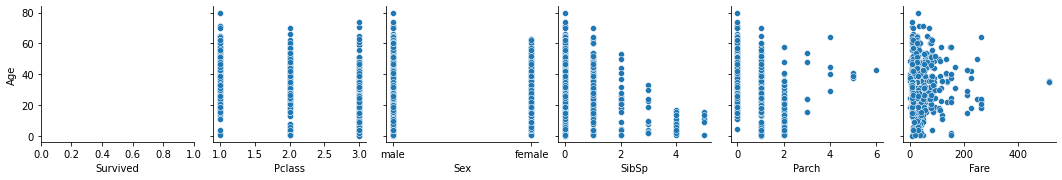

In [6]:
sns.pairplot(dataset,y_vars=['Age'],x_vars=['Survived','Pclass','Sex','SibSp','Parch','Fare'])

In [7]:
#^plots are data points.if sibling spouse is more,the median age is lower and if the sibling spouse is 0,the median age is high

In [8]:
dataset.groupby('SibSp')['Age'].median()

SibSp
0    29.0
1    30.0
2    23.0
3     9.5
4     6.5
5    11.0
8     NaN
Name: Age, dtype: float64

In [9]:
#^These are median values of Age for different sibling spouse.As the sibling spouse is increasing the median age is decreasing
#(from graph)

In [10]:
dataset[dataset['SibSp']==0]['Age'].median()

29.0

In [11]:
dataset[dataset['SibSp']==1]['Age'].median()

30.0

In [12]:
#^At spisp=0   to see what's the median value there we have used this but this can be messy thats why 
# we don't use this input often.

In [13]:
#Now let's see at rows(age177) where the age is missing let'scheck value for sibling spouse.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

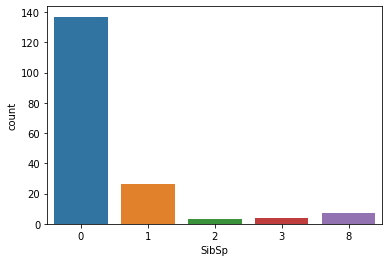

In [14]:
sns.countplot(x='SibSp',data=dataset[dataset['Age'].isnull()])

In [15]:
#^In the  case  where siblingspouse =8 let just take median of the age & use that as our reference spot imputing the missing 
#  values and sibling spouse.

In [16]:
dataset['Age'].median()

28.0

In [17]:
dataset['Age'] = np.where((dataset['SibSp']==8) & (dataset['Age'].isnull()),28,dataset['Age'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

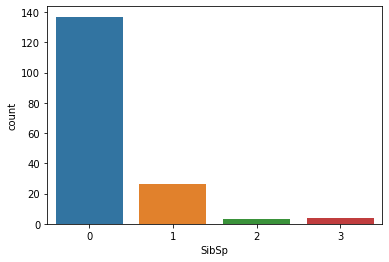

In [18]:
sns.countplot(x='SibSp',data=dataset[dataset['Age'].isnull()])   #row 8 is done

In [19]:
dataset['Age'] = np.where((dataset['SibSp']==0) & (dataset['Age'].isnull()),29,dataset['Age'])
dataset['Age'] = np.where((dataset['SibSp']==1) & (dataset['Age'].isnull()),30,dataset['Age'])
dataset['Age'] = np.where((dataset['SibSp']==2) & (dataset['Age'].isnull()),23,dataset['Age'])
dataset['Age'] = np.where((dataset['SibSp']==3) & (dataset['Age'].isnull()),9.5,dataset['Age'])


In [20]:
dataset.isnull().sum()  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
#^Still embark has 2 missing values & its  a categorical column so we can quicklly di it through  mode .

In [22]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
dataset['Embarked'].fillna('S',inplace=True)  # fill 'na'  by 'S'

In [24]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [25]:
#'PassengerId','Name','Ticket', &'Cabin' are irrelevant columns so drop them.

In [26]:
dataset.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)

In [27]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:xlabel='Age'>

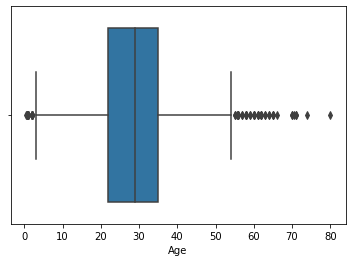

In [28]:
sns.boxplot(dataset['Age'])

<AxesSubplot:xlabel='Fare'>

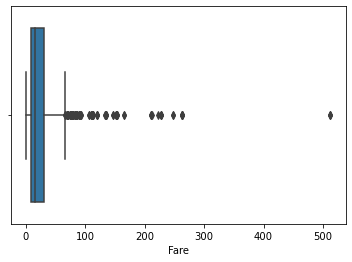

In [29]:
sns.boxplot(dataset['Fare'])

In [30]:
dataset.drop(dataset[dataset['Fare']>500].index,inplace=True)

<AxesSubplot:xlabel='Fare'>

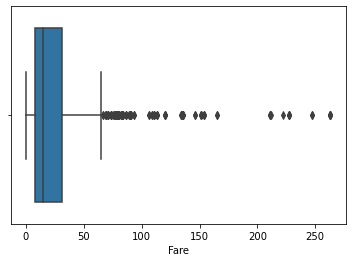

In [31]:
sns.boxplot(dataset['Fare'])

In [32]:
dataset.shape

(888, 8)

In [33]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Logistic Regression

In [34]:
#First we separate char.data & numerical data and then for char. data we will create dummy variables &then will catinate them

In [35]:
numerical_cols = dataset.select_dtypes(include=[np.number]).columns

In [36]:
numerical_cols   #these are the columns which have numerical datatype

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [37]:
numerical_df = dataset.select_dtypes(include=[np.number]).copy()

In [38]:
numerical_df    #here we will have datafrane now which is having only those numerical columns

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,30.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [39]:
character_df = dataset.select_dtypes(include='object').copy()

In [40]:
character_df 

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [41]:
dummies_df = pd.get_dummies(character_df)
dummies_df.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [42]:
#^Now char_df got convereted to dummies_df=pd.get where we have dummy values now

In [43]:
#now we will add numerical df & dummy df

In [44]:
combined_df = pd.concat([numerical_df,dummies_df],axis=1) 

In [45]:
#^axis=1 just to tell python that we want to add them columnwise

In [46]:
combined_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [47]:
#Now we will divide in X & Y(independent & dependent variables)

In [48]:
Y = combined_df['Survived']

In [49]:
X = combined_df.drop(columns='Survived')  #now everything will go in X except survived

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7, random_state=1)

In [51]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
76,3,29.0,0,0,7.8958,0,1,0,0,1
876,3,20.0,0,0,9.8458,0,1,0,0,1
735,3,28.5,0,0,16.1000,0,1,0,0,1
132,3,47.0,1,0,14.5000,1,0,0,0,1
475,1,29.0,0,0,52.0000,0,1,0,0,1


In [52]:
#^ If we will run it again then we will get the same output as we have mentioned random_state=1

In [53]:
#Now lets build our model using training data

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [54]:
model.fit(X_train,Y_train)

LogisticRegression()

In [55]:
#^We are asking the machine to learn from this data & build a model

In [56]:
#now we can predict values of X or Y i.e hard predictions

In [57]:
# Hard predictions
Y_pred = model.predict(X_test)

In [58]:
Y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [59]:
#O/P=0 means the person will not survive & 1 means person will survive.For Test data the model has made predictions,now we will
# compare it with actual Y values & see how good or bad our model is

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [61]:
#lets see our confusion matrix now

In [62]:
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

# TN  FP
# FN  TP

[[134  27]
 [ 30  76]]


In [63]:
#We can also check accuracy using accuracy_score

In [64]:
accuracy_score(Y_test,Y_pred)

0.7865168539325843

# ROC CURVE

In [65]:
from sklearn.metrics import roc_auc_score  #this is to calculate area under the curve

In [66]:
# Based on hard predictions
area_under_ROC = roc_auc_score(Y_test,Y_pred)

In [67]:
print('Area under ROC Curve =',area_under_ROC)  

Area under ROC Curve = 0.7746396343607171


In [68]:
#^Higher the area under the  ROC curve,the better is the model

In [69]:
# Based on soft predictions
area_under_ROC = roc_auc_score(Y_test,model.predict_proba(X_test)[:,1])

In [70]:
#NOTE=RATHER THAN HARD PREDICTIONS IF WE USE SOFT PREDICTIONS TO FIND AREA UNDER ROC CURVE THEN IT WILL NOT CHANGE i.e hard
# predictions hi humesha change hote rehte h

In [71]:
print(area_under_ROC)

0.8482362592288762


# Plotting the ROC curve

In [72]:
from sklearn.metrics import roc_curve

In [73]:
# Soft predictions
model.predict_proba(X_test)

array([[0.8300002 , 0.1699998 ],
       [0.38468573, 0.61531427],
       [0.48657718, 0.51342282],
       [0.89801575, 0.10198425],
       [0.41740832, 0.58259168],
       [0.13738456, 0.86261544],
       [0.60997559, 0.39002441],
       [0.17311243, 0.82688757],
       [0.07630139, 0.92369861],
       [0.38469566, 0.61530434],
       [0.87711749, 0.12288251],
       [0.81339312, 0.18660688],
       [0.77534606, 0.22465394],
       [0.71914349, 0.28085651],
       [0.30027393, 0.69972607],
       [0.18275043, 0.81724957],
       [0.51123245, 0.48876755],
       [0.03642239, 0.96357761],
       [0.91749826, 0.08250174],
       [0.44246204, 0.55753796],
       [0.84571368, 0.15428632],
       [0.87711749, 0.12288251],
       [0.03671172, 0.96328828],
       [0.94043063, 0.05956937],
       [0.16217067, 0.83782933],
       [0.16895206, 0.83104794],
       [0.85780175, 0.14219825],
       [0.2625487 , 0.7374513 ],
       [0.26644593, 0.73355407],
       [0.90633673, 0.09366327],
       [0.

In [74]:
#^o/p=0.83062502 is probability of 0=not survived and 0.16937498 is probability of 1=survived

In [75]:
fpr,tpr,thresholds = roc_curve(Y_test,model.predict_proba(X_test)[:,1])  #[:=rows,1=columns]

In [76]:
#^here we are saying make the predictions based on column 1(not for 0 only for 1 means secomd wala)

In [77]:
fpr  #o/p=these are different values of fpr

array([0.        , 0.        , 0.        , 0.00621118, 0.00621118,
       0.01863354, 0.01863354, 0.0310559 , 0.0310559 , 0.04347826,
       0.04347826, 0.04968944, 0.04968944, 0.05590062, 0.05590062,
       0.0621118 , 0.0621118 , 0.08074534, 0.08074534, 0.08695652,
       0.08695652, 0.0931677 , 0.0931677 , 0.09937888, 0.09937888,
       0.11801242, 0.11801242, 0.11801242, 0.11801242, 0.1242236 ,
       0.1242236 , 0.13664596, 0.13664596, 0.14285714, 0.14285714,
       0.16770186, 0.16770186, 0.1863354 , 0.1863354 , 0.19254658,
       0.2173913 , 0.2173913 , 0.22981366, 0.22981366, 0.23602484,
       0.23602484, 0.27329193, 0.27329193, 0.28571429, 0.28571429,
       0.29813665, 0.29813665, 0.30434783, 0.30434783, 0.34782609,
       0.34782609, 0.35403727, 0.35403727, 0.36024845, 0.36024845,
       0.37267081, 0.37267081, 0.39751553, 0.39751553, 0.42857143,
       0.45341615, 0.51552795, 0.51552795, 0.60248447, 0.60248447,
       0.61490683, 0.63975155, 0.73291925, 0.74534161, 0.75155

In [78]:
a = pd.Series(fpr)
b = pd.Series(tpr)
c = pd.Series(thresholds)
df_roc = pd.concat([a,b,c],axis=1)

In [79]:
a = pd.Series(fpr)
b = pd.Series(tpr)
c = pd.Series(thresholds)
df_roc = pd.concat([a,b,c],axis=1,keys=['FPR','TPR','THRESHOLD']).sort_values(by='TPR',ascending=False)

In [80]:
df_roc[(df_roc['THRESHOLD']>0.45) & (df_roc['THRESHOLD']<0.55)]

,FPR,TPR,THRESHOLD
38,0.186335,0.735849,0.457017
37,0.186335,0.716981,0.488768
36,0.167702,0.716981,0.506628
35,0.167702,0.707547,0.513423


In [81]:
#^O/P= jaise-2 threshold change krenge humari hard predictions bhi change hogi & agr hard prediction change hogi toh FPR &
#TPR bhi change hoga

Text(0, 0.5, 'True Positive Rate')

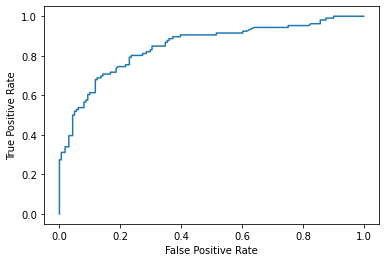

In [82]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Change the Classifier cutoff Value

In [83]:
threshold = 0.35

Y_pred = (model.predict_proba(X_test)[:,1]>=threshold).astype(int)

In [84]:
Y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [85]:
threshold = 0.15

Y_pred = (model.predict_proba(X_test)[:,1]>=threshold).astype(int)

In [86]:
Y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1])

In [87]:
#^so we can change our Y_pred based on any threshold we want

In [88]:
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[80 81]
 [10 96]]


In [89]:
accuracy_score(Y_test,Y_pred)

0.6591760299625468

In [90]:
#^Now if we change the threshold the accuracy will change

In [91]:
# Based on hard predictions
area_under_ROC = roc_auc_score(Y_test,Y_pred)
print(area_under_ROC)

0.7012773936481894


In [92]:
# Based on soft predictions
area_under_ROC = roc_auc_score(Y_test,model.predict_proba(X_test)[:,1])
print(area_under_ROC)

0.8482362592288762
